### Data Analysis (EDA) + Tensorflow classification model + Randomforest Classifier + Best model selection for Dockerized Website

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [35]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Basic EDA

In [36]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [38]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [39]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [40]:
#categorize into only two categories -> good and bad

df["good"] = df.quality.apply(lambda x: 1 if x > 6 else 0)
df.drop("quality", axis=1,inplace=True)

<AxesSubplot:xlabel='good', ylabel='count'>

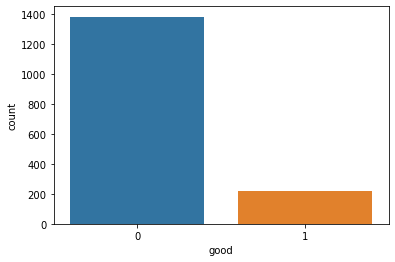

In [41]:
sns.countplot(data=df,x="good")

<AxesSubplot:>

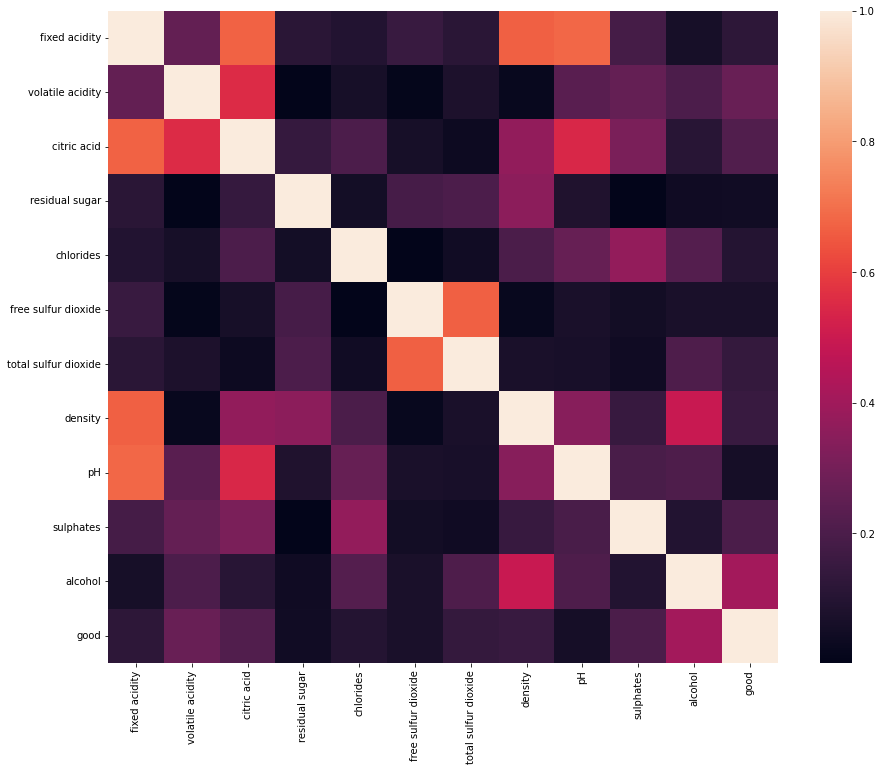

In [42]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr().abs())

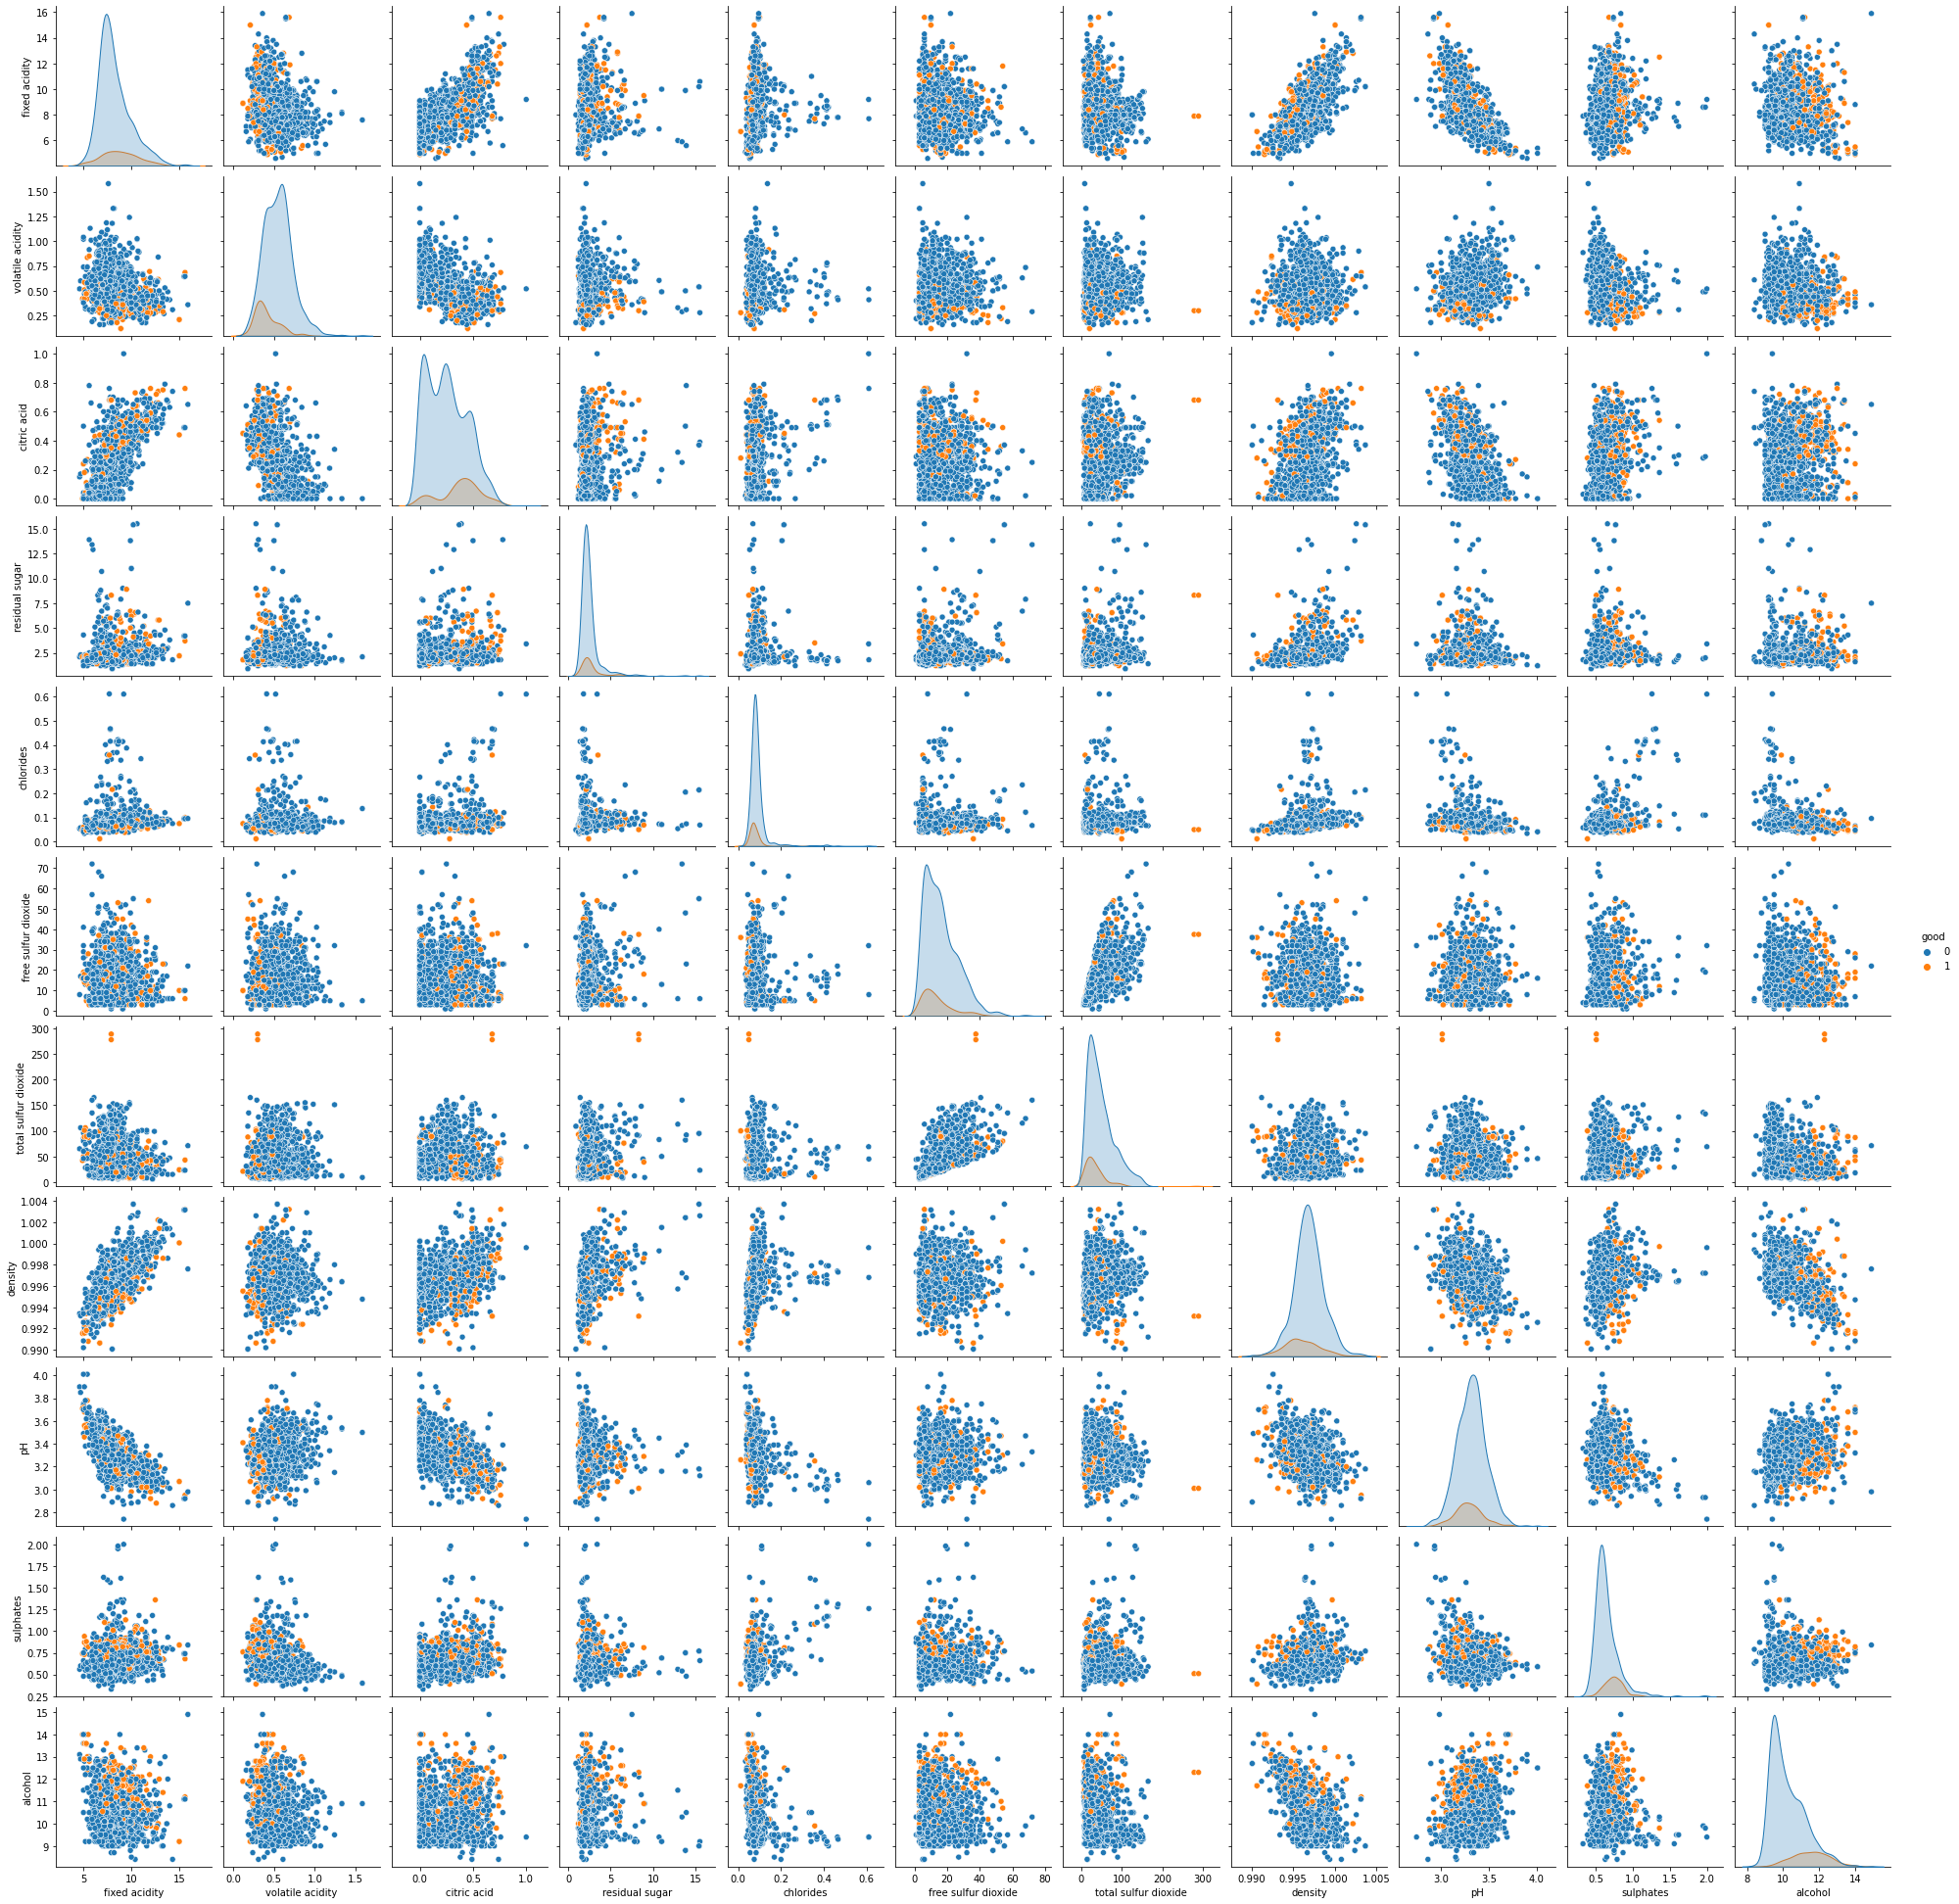

In [43]:
sns.pairplot(df, hue="good")

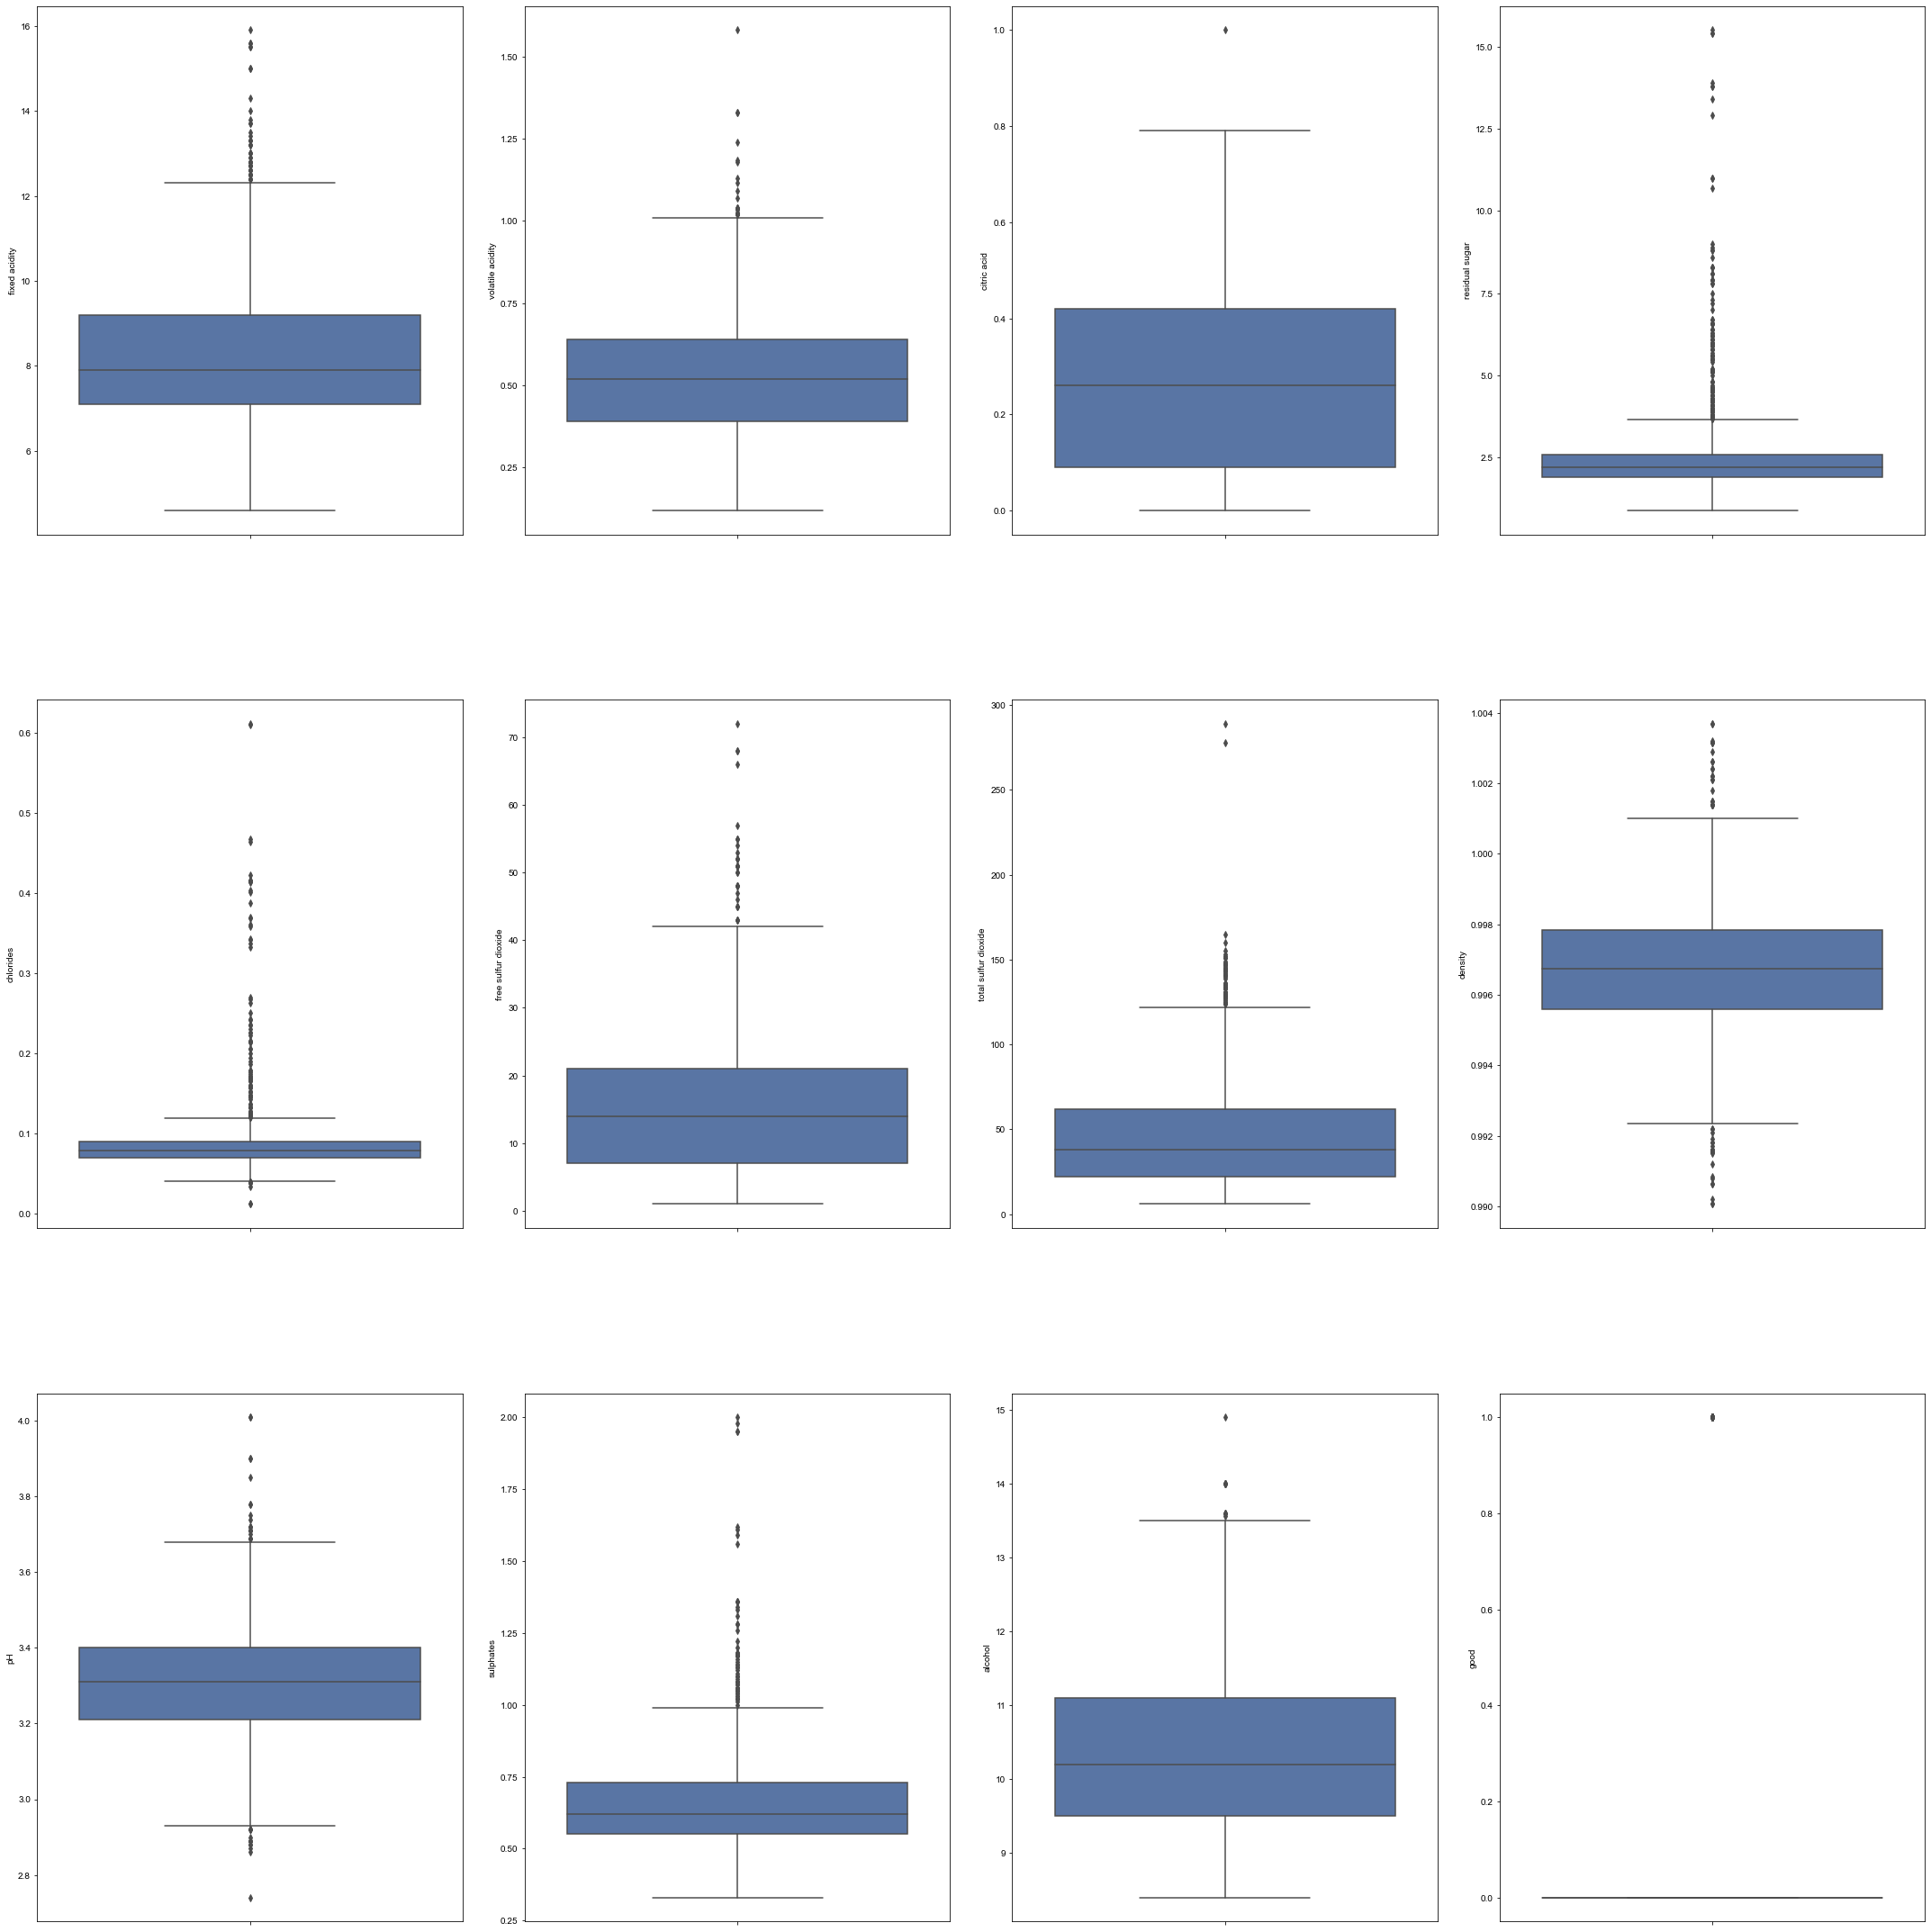

In [44]:
#outliers
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(30,30))
index = 0
sns.set(font_scale=3)
sns.set_style("whitegrid")
axs = axs.flatten()

for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index +=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [46]:
#import more packages for model prediction

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, LearningRateScheduler
from tensorflow.keras.regularizers import L2

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, auc

In [47]:
X = df.drop("good", axis=1)
y = df["good"]

In [48]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
X_train.shape

(1279, 11)

In [51]:
#build the model
model = Sequential()

model.add(Dense(units = 11, activation = 'relu', kernel_regularizer=L2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
model.fit(x=X_train, y= y_train, epochs=100, validation_data = (X_test, y_test),batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/100
40/40 [==============================] - 4s 27ms/step - loss: 0.6608 - accuracy: 0.6747 - val_loss: 0.5930 - val_accuracy: 0.8531
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 0.5334 - accuracy: 0.8647 - val_loss: 0.4987 - val_accuracy: 0.8531
Epoch 3/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4633 - accuracy: 0.8671 - val_loss: 0.4544 - val_accuracy: 0.8531
Epoch 4/100
40/40 [==============================] - 0s 8ms/step - loss: 0.4290 - accuracy: 0.8671 - val_loss: 0.4346 - val_accuracy: 0.8531
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4173 - accuracy: 0.8671 - val_loss: 0.4259 - val_accuracy: 0.8531
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4077 - accuracy: 0.8671 - val_loss: 0.4207 - val_accuracy: 0.8531
Epoch 7/100
40/40 [==============================] - 0s 8ms/step - loss: 0.4077 - accuracy: 0.8671 - val_loss: 0.4161 - val_accuracy: 0.8531
Epoch 8/100


<AxesSubplot:>

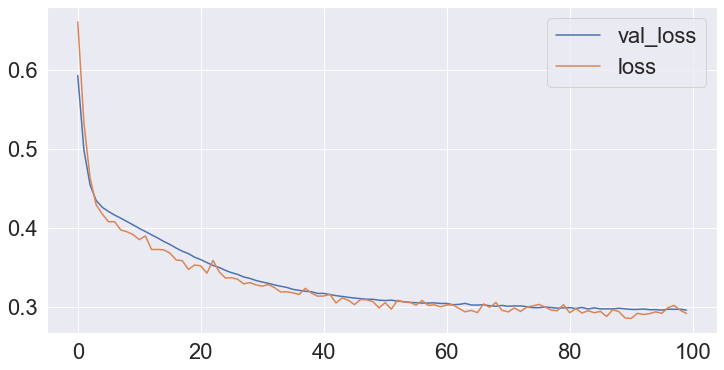

In [52]:
#model evaluation
sns.set(font_scale=2)
losses = pd.DataFrame(model.history.history)

losses[['val_loss', 'loss']].plot(figsize=(12,6))

In [53]:
#model predictions
predictions = (model.predict(X_test)>0.5).astype("int32")

print(classification_report(y_test, predictions))

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       273
           1       0.52      0.26      0.34        47

    accuracy                           0.86       320
   macro avg       0.70      0.61      0.63       320
weighted avg       0.83      0.86      0.83       320



[Text(0, 0.5, 'Bad Quality'), Text(0, 1.5, 'Good Quality')]

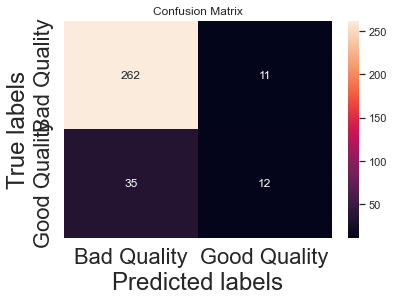

In [54]:
#model evaluation
cm = confusion_matrix(y_test,predictions)

labels = ['Bad Quality', 'Good Quality']

ax = plt.subplot()
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [55]:
#build the model 2
model_2 = Sequential()

model_2.add(Dense(units = 11, activation = 'relu', kernel_regularizer=L2(0.001)))
model_2.add(Dropout(0.2))

model_2.add(Dense(units = 6, activation = 'relu', kernel_regularizer=L2(0.001)))
model_2.add(Dropout(0.2))

model_2.add(Dense(units = 1, activation = 'sigmoid'))

model_2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
scheduler = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
model_2.fit(x=X_train, y= y_train, epochs=100, validation_data = (X_test, y_test),batch_size=32, callbacks=[scheduler], verbose=1)

Epoch 1/100
40/40 [==============================] - 3s 17ms/step - loss: 0.6042 - accuracy: 0.7928 - val_loss: 0.5948 - val_accuracy: 0.8469 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 0.5784 - accuracy: 0.8131 - val_loss: 0.5775 - val_accuracy: 0.8500 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 0s 7ms/step - loss: 0.5660 - accuracy: 0.8288 - val_loss: 0.5579 - val_accuracy: 0.8531 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 0.5432 - accuracy: 0.8428 - val_loss: 0.5354 - val_accuracy: 0.8531 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 0s 8ms/step - loss: 0.5160 - accuracy: 0.8507 - val_loss: 0.5121 - val_accuracy: 0.8531 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 0s 8ms/step - loss: 0.5031 - accuracy: 0.8608 - val_loss: 0.4894 - val_accuracy: 0.8531 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] 

Text(0.5, 1.0, 'Learning Rate vs. Loss')

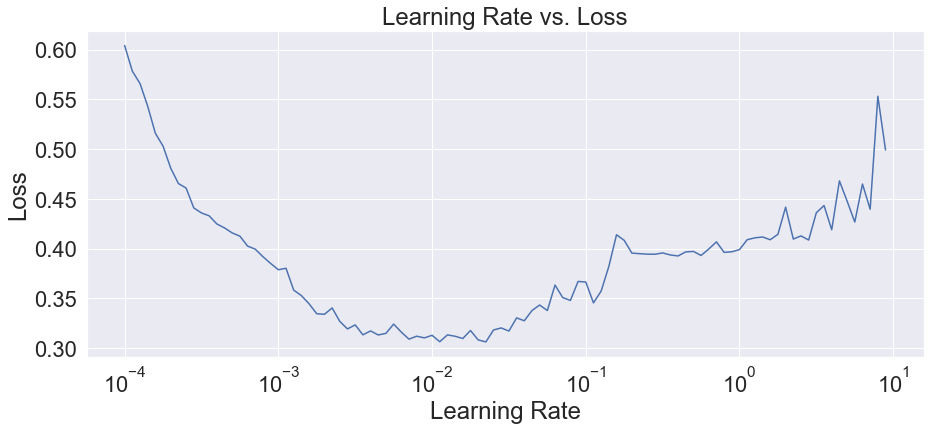

In [56]:
#finding the optimal learning rate
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(15, 6))
sns.set(font_scale=2)
plt.semilogx(lrs, model_2.history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

<AxesSubplot:>

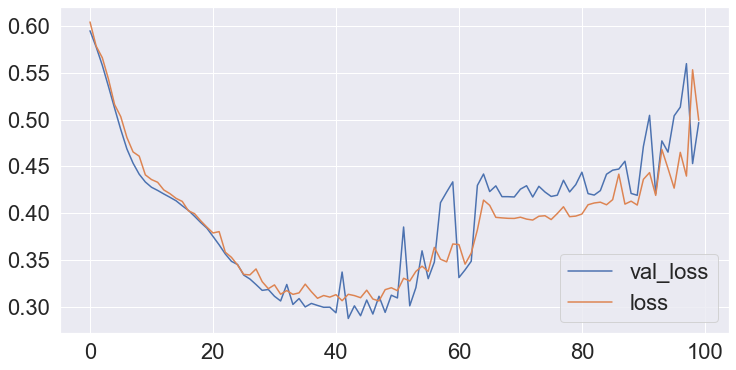

In [57]:
#model evaluation
sns.set(font_scale=2)

losses = pd.DataFrame(model_2.history.history)

losses[['val_loss', 'loss']].plot(figsize=(12,6))

In [58]:
#predict model 2 + evaluate
predictions = (model_2.predict(X_test)>0.5).astype("int32")

print(classification_report(y_test, predictions))


10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



c:\Users\timon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\timon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\timon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### First Model (name = model) delivers better results 
#### good quality wine needs to get improved...

In [59]:
#save model for dockerized website
from keras.models import load_model

model.save('predict_credit.h5')

new_model = load_model('predict_credit.h5')

In [60]:
# filename = 'tensorflow_wineclassifier.pickle'
# pickle.dump(model, open(filename, 'wb'))

# with open (filename, 'wb') as f:
#     pickle.dump(model, f)

# with open(filename, 'rb') as f:
#     loaded_pipe = pickle.load(f)

In [62]:
#testing saved model for new random single value input

list_value = [[7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0]]
column_value = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
dataframe = pd.DataFrame(list_value, columns = column_value)

dataframe.iloc[0]

fixed acidity            7.3000
volatile acidity         0.6500
citric acid              0.0000
residual sugar           1.2000
chlorides                0.0650
free sulfur dioxide     15.0000
total sulfur dioxide    21.0000
density                  0.9946
pH                       3.3900
sulphates                0.4700
alcohol                 10.0000
Name: 0, dtype: float64

### Test the model to predict good or bad quality wine in a function

In [63]:
def predict(model, list_value):

    list_value = np.array(dataframe)

    predict_x = model.predict(list_value.reshape(1,11))

    classes_x=np.argmax(predict_x,axis=1)

    return classes_x

if __name__=="__main__":

    list_value = [[7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5]]

    column_value = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
       
    dataframe = pd.DataFrame(list_value, columns = column_value)
    	

    prdct = predict(new_model, dataframe)

    if prdct == 0:
        prdct = "bad"
    else:
        prdct = "good"
    
    print('Expected quality is {}'.format(prdct))


1/1 [==============================] - 0s 129ms/step
Expected quality is bad


### Test a classic random forest classifier to compare to deep learning model

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [65]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=100)

In [66]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.86875

c:\Users\timon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


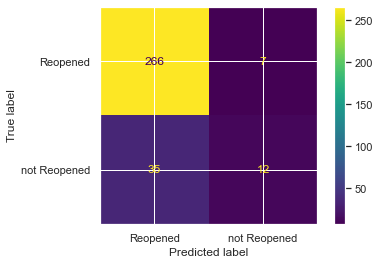

In [67]:
sns.set(font_scale=1)
plot_confusion_matrix(rfc, X_test, y_test, values_format='d', display_labels=["Reopened", "not Reopened"])

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



c:\Users\timon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\timon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\timon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Classifier has similar results to deep neural net model

#### bigest issue is the data imbalance less amount of good quality wine values

In [69]:
#Multiple ML to find a promissing ml algorithm & to see if there might be a better Model to predict wine quality

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import LabelEncoder

from scipy.stats import uniform, randint

from sklearn.metrics import auc, plot_confusion_matrix, accuracy_score,roc_auc_score , confusion_matrix, mean_squared_error, classification_report, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

c:\Users\timon\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [70]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "XGBoost",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    xgb.XGBClassifier(learning_rate =  0.1, max_depth = 2, n_estimators = 50),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [71]:
scores = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred, average='micro')
    scores.append(score)

c:\Users\timon\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [79]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df.sort_values('score', ascending =False)

,name,score
5,Gradient_Boosting,0.903125
0,Nearest_Neighbors,0.893750
7,Extra_Trees,0.893750
6,Decision_Tree,0.875000
8,Random_Forest,0.875000
3,RBF_SVM,0.868750
4,XGBoost,0.862500
9,Neural_Net,0.862500
2,Polynomial_SVM,0.856250
1,Linear_SVM,0.853125


In [73]:
#testing a top 3 ML performer
etc = ExtraTreesClassifier(n_estimators=10, min_samples_split=2)

etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.915625

In [74]:
print(classification_report(y_test, y_pred))

#best results with extra tree classifier -> here hyperparameter tuning

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       273
           1       0.86      0.51      0.64        47

    accuracy                           0.92       320
   macro avg       0.89      0.75      0.80       320
weighted avg       0.91      0.92      0.91       320



In [75]:
X_train.shape

(1279, 11)

In [76]:
model = ExtraTreesClassifier(n_estimators=50, n_jobs=4, min_samples_split=15,
                            min_samples_leaf=2, max_features=11)




gsc = GridSearchCV(
    estimator=model,
    param_grid={
        #'n_estimators': range(0,100,25),
        'max_features': range(0,11,2),
        #'min_samples_leaf': range(0,50,2),
        #'min_samples_split': range(15,36,5),
    },
    scoring='r2',
    cv=5
)

grid_result = gsc.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
model = ExtraTreesClassifier(**grid_result.best_params_)

model.fit(X_train, y_train)

c:\Users\timon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\timon\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "c:\Users\timon\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "c:\Users\timon\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    retur

Best: 0.036672 using {'max_features': 6}


ExtraTreesClassifier(max_features=6)

In [77]:
ypred  = model.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320



[Text(0, 0.5, 'Bad Quality'), Text(0, 1.5, 'Good Quality')]

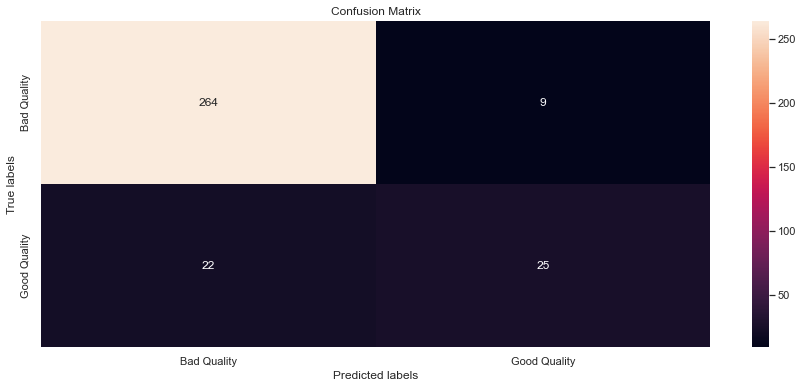

In [78]:
sns.set(font_scale=1)

plt.figure(figsize=(15,6))

cm = confusion_matrix(y_test,ypred)

labels = ['Bad Quality', 'Good Quality']

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)